In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
path = Path('/content/drive/MyDrive/flower/')
class_names = list(path.glob('*'))

In [4]:
import cv2
X = []
y = []
flowers = ['tulips', 'daisy', 'dandelion', 'roses', 'sunflowers']
for class_name in class_names:
  print(class_name)
  images_path = list(class_name.glob('*'))
  for im_path in images_path:
    img = cv2.imread(str(im_path), 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    label = flowers.index(str(class_name).split('/')[-1])
    X.append(img)
    y.append(label)

/content/drive/MyDrive/flower/tulips
/content/drive/MyDrive/flower/daisy
/content/drive/MyDrive/flower/dandelion
/content/drive/MyDrive/flower/roses
/content/drive/MyDrive/flower/sunflowers


In [5]:
from keras.utils import to_categorical
y = to_categorical(y)

In [6]:
print(y.shape)
print(np.array(X).shape)

(3670, 5)
(3670, 128, 128, 3)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [8]:
# Preprocess image
def preprocess(image):
  image = image.astype('float32')/255.0
  return image
X_train = preprocess(X_train)
X_test = preprocess(X_test)
print(X_train.shape)
print(X_test.shape)

(2936, 128, 128, 3)
(734, 128, 128, 3)


In [9]:
print(y_train.shape)
print(y_test.shape)

(2936, 5)
(734, 5)


In [10]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add((Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3), padding='same')))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dense(5, activation= 'softmax'))

In [11]:
from keras.optimizers import Adam
import keras
model.compile(optimizer= Adam(), loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size= 128 , epochs= 20 , verbose= 2)

Epoch 1/20
23/23 - 10s - loss: 2.4498 - accuracy: 0.2319 - 10s/epoch - 446ms/step
Epoch 2/20
23/23 - 1s - loss: 1.5815 - accuracy: 0.2837 - 1s/epoch - 55ms/step
Epoch 3/20
23/23 - 1s - loss: 1.3943 - accuracy: 0.4240 - 1s/epoch - 55ms/step
Epoch 4/20
23/23 - 1s - loss: 1.1372 - accuracy: 0.5490 - 1s/epoch - 56ms/step
Epoch 5/20
23/23 - 1s - loss: 0.8445 - accuracy: 0.6918 - 1s/epoch - 56ms/step
Epoch 6/20
23/23 - 1s - loss: 0.6158 - accuracy: 0.7916 - 1s/epoch - 55ms/step
Epoch 7/20
23/23 - 1s - loss: 0.3684 - accuracy: 0.8873 - 1s/epoch - 56ms/step
Epoch 8/20
23/23 - 1s - loss: 0.2334 - accuracy: 0.9465 - 1s/epoch - 56ms/step
Epoch 9/20
23/23 - 1s - loss: 0.1339 - accuracy: 0.9724 - 1s/epoch - 56ms/step
Epoch 10/20
23/23 - 1s - loss: 0.0828 - accuracy: 0.9860 - 1s/epoch - 56ms/step
Epoch 11/20
23/23 - 1s - loss: 0.0476 - accuracy: 0.9942 - 1s/epoch - 56ms/step
Epoch 12/20
23/23 - 1s - loss: 0.0306 - accuracy: 0.9963 - 1s/epoch - 56ms/step
Epoch 13/20
23/23 - 1s - loss: 0.0212 - accura

In [13]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,y_test)

23/23 [==============================] - 1s 15ms/step - loss: 3.6803 - accuracy: 0.4360


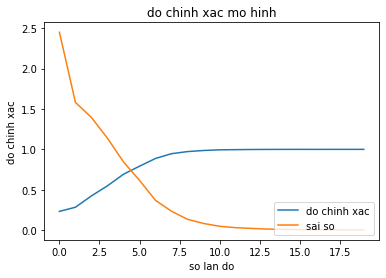

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('do chinh xac mo hinh')
plt.ylabel('do chinh xac')
plt.xlabel('so lan do')
plt.legend(['do chinh xac','sai so'], loc = 'lower right')

(128, 128, 3)
1/1 [==============================] - 0s 151ms/step
sunflowers
sunflowers


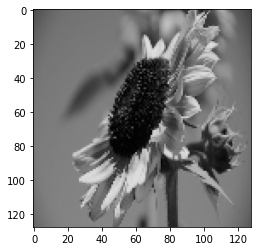

In [16]:
n = 11
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128, 3)))
print(flowers[pred.argmax()])
print(flowers[y_test[n].argmax()])

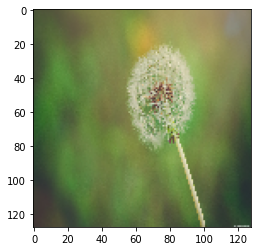

In [23]:
from keras.utils.image_utils import load_img
image = load_img('/content/hinh-anh-hoa-bo-cong-anh-54.jpg', target_size=(128,128))
plt.imshow(image)

In [24]:
from keras.utils.image_utils import img_to_array
x = image
img = img_to_array(x)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
print(flowers[tag[0]])

1/1 [==============================] - 0s 18ms/step
dandelion
